#Validating an channel model IV curve with data from an experiment

In [2]:
# Imports and preliminaries.  
%matplotlib inline
import os,sys
import numpy as np

CW_HOME = os.path.pardir # Location of your ChannelWorm repo
sys.path.insert(1,CW_HOME)

from channelworm.fitter import Initiator



##Compare the IV curve predicted from the channel model to that observed from the data

In [3]:
from neuronunit.tests.channel import IVCurvePeakTest
from neuronunit.models.channel import ChannelModel
# Warning message comes from NeuroTools, soon to be replaced by Elephant.  Ignore.  

In [4]:
# Instantiate the model
channel_model_name = 'EGL-19.channel'
channel_id = 'ca_boyle'
channel_file_path = os.path.join(CW_HOME,'models','%s.nml' % channel_model_name)

model = ChannelModel(channel_file_path,channel_index=0,name=channel_model_name)

In [5]:
# Get the experiment data from ChannelWorm and instantiate the test

import os, sys
import django

sys.path.append("../channelworm") # Change the path if needed
os.environ.setdefault(
    "DJANGO_SETTINGS_MODULE",
    "web_app.settings"
)
django.setup()

from ion_channel.models import GraphData

doi = '10.1083/jcb.200203055'
fig = '2B'
sample_data = GraphData.objects.get(graph__experiment__reference__doi=doi, graph__figure_ref_address=fig)
obs = list(zip(*sample_data.asarray())) 
observation = {'i':obs[0], 'v':obs[1]}

test = IVCurvePeakTest(observation)

In [6]:
# Judge the model output against the experimental data
score = test.judge(model)
score.summarize()
print("The score was computed according to '%s' with raw value %s" % (score.description,score.value))

=== Model Cav1.channel (ChannelModel) achieved score Fail on test 'IV Curve Test (IVCurvePeakTest)'. ===
The score was computed according to 'The sum-squared difference in the observed and predicted current values over the range of the tested holding potentials.' with raw value 1068 pA^2


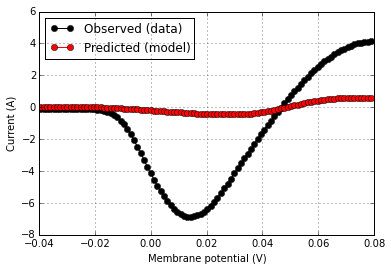

In [7]:
rd = score.related_data
score.plot(rd['v'],rd['i_obs'],color='k',label='Observed (data)')
score.plot(rd['v'],rd['i_pred'],same_fig=True,color='r',label='Predicted (model)')